# A/B Test on Ads

An A/B test will be conducted on the following dataset I pulled from Kaggle. 

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

df = pd.read_csv('AdSmartABd.csv')
print(df.head(5))
print(df.dtypes)

                             auction_id experiment        date  hour  \
0  0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1  000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2  0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3  00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4  001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   

          device_make  platform_os                browser  yes  no  
0  Generic Smartphone            6          Chrome Mobile    0   0  
1  Generic Smartphone            6          Chrome Mobile    0   0  
2               E5823            6  Chrome Mobile WebView    0   1  
3   Samsung SM-A705FN            6               Facebook    0   0  
4  Generic Smartphone            6          Chrome Mobile    0   0  
auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object

 It looks like the A/B test will be performed on the 'exposed' v. the 'control' versions of the experiment. I organized the data into a matrix for further insight.

             yes    no
experiment            
control     4071  4071
exposed     4006  4006
yes    8077
no     8077
dtype: int64
            yes   no
experiment          
control     264  322
exposed     308  349


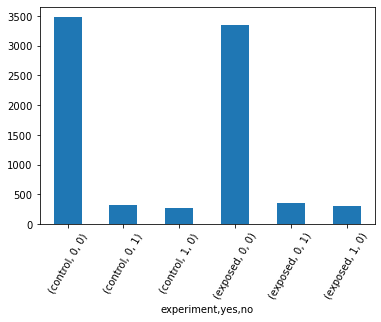

In [3]:
print(df.groupby('experiment')[['yes', 'no']].count())
print(df.groupby('experiment').count()[['yes', 'no']].sum())

print(df.groupby('experiment')[['yes', 'no']].sum())
cats = df.groupby(['experiment', 'yes', 'no']).size()
ax = cats.plot.bar(rot=60)

The dataset distinguishes between whether the 'control' and 'exposed' version of the experiment had the user click either yes or no.

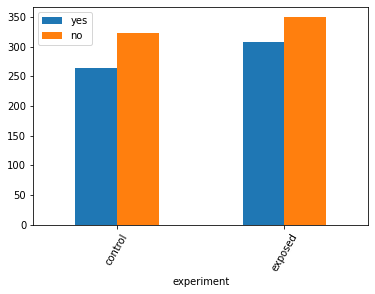

In [4]:
dog = df.groupby('experiment')[['yes', 'no']].sum()
ax = dog.plot.bar(rot=60)
plt.show()

For simplicity, I'll only consider the level of engagement with the different ads. Engagement will consist of seeing and click the on the ad (whether yes or no) and non-engagement (not clicking on the ad). 

array([<AxesSubplot:ylabel='experiment'>], dtype=object)

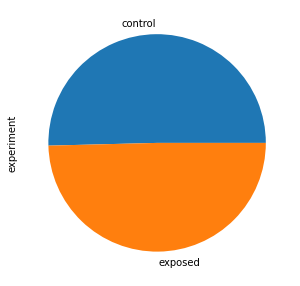

In [6]:
df['experiment'].value_counts().plot.pie(subplots=True, y='ad experiment', figsize=(5,5))

Although there's more factors to consider (hour of ad engagement, platform on which ad was engaged, etc.) I'll only be running a significance (chi-squared) test on the engagement between the "control" and "exposed" versions of the ads. That is, I'll consider both "yes" and "no" as engagement and sum both to measure the level of engagement.

First, I need to clean the data. Luckily, this data is already well suited for analysis. Nevertheless, I'll need to for duplicates in the auction_id to remove any double counting.

In [17]:
df[df.duplicated(['auction_id'], keep=False,)]['auction_id']
print('The number of duplicate enteries is ' + str(df['auction_id'].duplicated().sum()))

The number of duplicate enteries is 0


Luckily, there weren't any duplicates in the data. I can now move onto the analysis. I'll select a standard p = .05 significance threshold to determine if there is a differnece in the two ads. The test is as follows:

h0 (null hypothesis): There is no significant difference in the engagement between both ads 

h1 (alternative hypothesis): Fail to reject that there is no significance in the engagement between both ads.

First, I'll make 2x2 matrix to insert into the chi-square test. I'll call the matrix F.

In [7]:
yes_cont = df.loc[df['experiment'] == 'control', 'yes'].sum()
no_cont = df.loc[df['experiment'] == 'control', 'no'].sum()
df_cont_clicked = yes_cont + no_cont


yes_exp = df.loc[df['experiment'] == 'exposed', 'yes'].sum()
no_exp = df.loc[df['experiment'] == 'exposed', 'no'].sum()
df_exp_clicked = yes_exp + no_exp

df_exp = df.experiment
df_cont_total = df_exp.loc[df['experiment'] == 'control'].count()
df_exp_total = df_exp.loc[df['experiment'] == 'exposed'].count()


F = np.array([[df_cont_clicked, df_cont_total], [df_exp_clicked, df_exp_total]], dtype=object)
print(F)

[[586 4071]
 [657 4006]]


Finally, the Chi-Squared test.

In [15]:
chi2, pval, dof, expected = chi2_contingency(F)
adj_pval = round(pval, 2)
print(adj_pval)
print('After running the Chi-Squared test, the test determined that the pval is: ' + str(adj_pval))

0.03
After running the Chi-Squared test, the test determined that the pval is: 0.03


Because our adjusted p-value is less than our significance threshold, .03 < .05, we conclude that we fail to reject that there is no significance in the engagement between both ads.